In [15]:
import sys
import os

project_root = os.path.abspath(os.path.join(os.getcwd(), ".."))
sys.path.insert(0, project_root)

In [16]:
# vit_shap.ipynb

import torch
from vit import get_vit_model, get_vit_model_with_hooks
from data.data import get_imagenette_dataloader
from utils.shap_utils import compute_shap_values, visualize_shap
from utils.vit_utils import visualize_attention_map

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [4]:
model = get_vit_model(model_name='vit_base_patch16_224', pretrained=True, num_classes=10)

In [5]:
dataloader = get_imagenette_dataloader(batch_size=10, img_size=224)
images, labels = next(iter(dataloader))
device = next(model.parameters()).device
images = images.to(device)

img_idx = 0

imagenette already exists, skipping download


## Generate Shapley Values

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


SHAP value range before normalization: min=0.00046037062589487026, max=0.010236625343136756
SHAP value range after scaling: min=0.023018531294743513, max=0.5118312671568378
Normalized SHAP value range: min=0.0, max=0.48613817595456615


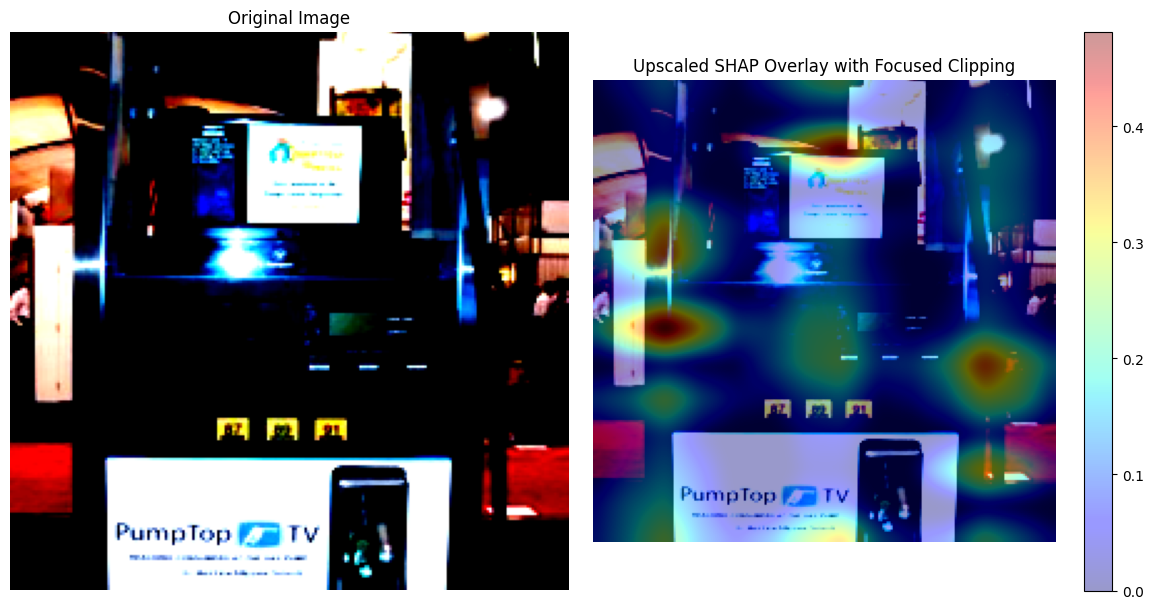

In [29]:
shap_values = compute_shap_values(model, images)
original_image = images[img_idx].cpu().numpy().transpose((1, 2, 0))
visualize_shap(shap_values, original_image, patch_size=16)

## Create Attention Maps

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Captured attention map shape: (10, 12, 197, 197)


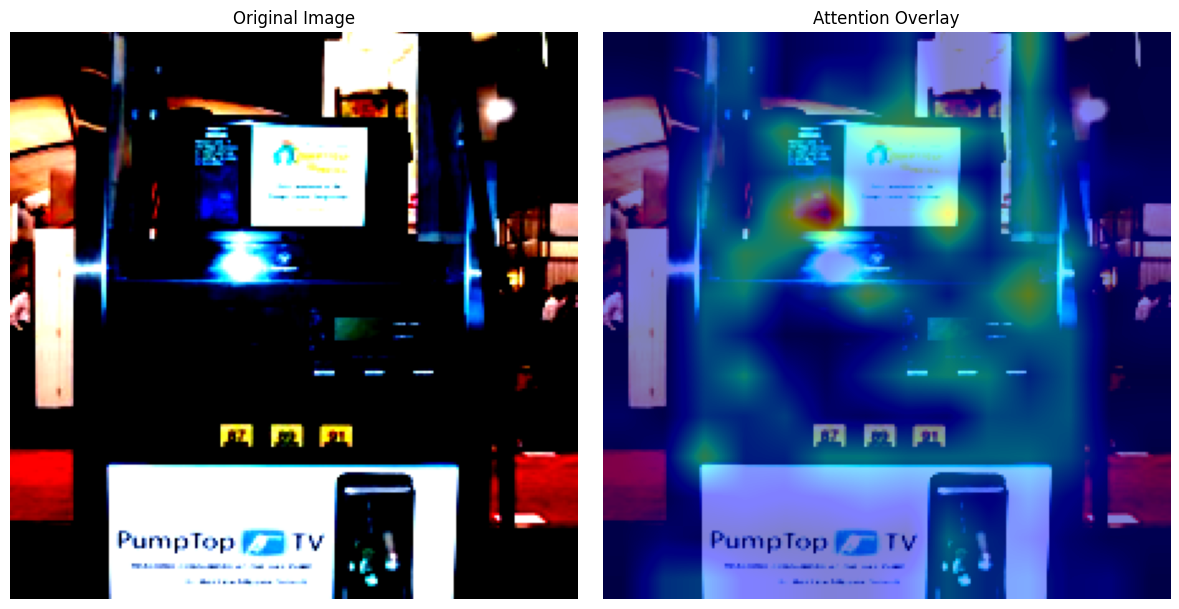

In [7]:
model_hook, attention_maps = get_vit_model_with_hooks(model_name='vit_base_patch16_224', pretrained=True, num_classes=10)

with torch.no_grad():
    _ = model_hook(images)

visualize_attention_map(images[img_idx], attention_maps) # let's compare attention map with shapley vis